#WORKSHEET - 10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Necessary import throughout the worksheet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Naive Bayes Classifier for Spam or Ham Mails

## Import Necessary Libraries


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

##Load the Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/W10_dataset/spam_ham_dataset.csv')
data = data.drop(['Unnamed: 0'], axis = 1)
length = len(data['text'])
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


##Text Cleaning with NLTK Library

In [ ]:
corpus = []

for i in range(0, length):
  # re to remove anything other than alphabets (punctuations)
  text = re.sub('[^a-zA-Z]', ' ', data['text'][i])

  # lower the text
  text = text.lower()

  # Stemming
  # 1. split
  text = text.split()
  # 2. apply stemming from PorterStemmer
  ps = PorterStemmer()
  all_stopwords = set(stopwords.words('english'))
  text = [ps.stem(word) for word in text if not word in all_stopwords]
  # 3. join stemmed words
  text = ' '.join(text)

  # Add to corpus
  corpus.append(text)

In [ ]:
data_verify = data.copy()
data_verify['text'] = corpus
data_verify.head()

,label,text,label_num
0,ham,subject enron methanol meter follow note gave ...,0
1,ham,subject hpl nom januari see attach file hplnol...,0
2,ham,subject neon retreat ho ho ho around wonder ti...,0
3,spam,subject photoshop window offic cheap main tren...,1
4,ham,subject indian spring deal book teco pvr reven...,0


In [ ]:
data_verify['cleanText'] = data_verify['text'].str.replace('subject','')
data_verify.head()

,label,text,label_num,cleanText
0,ham,subject enron methanol meter follow note gave ...,0,enron methanol meter follow note gave monday ...
1,ham,subject hpl nom januari see attach file hplnol...,0,hpl nom januari see attach file hplnol xl hpl...
2,ham,subject neon retreat ho ho ho around wonder ti...,0,neon retreat ho ho ho around wonder time year...
3,spam,subject photoshop window offic cheap main tren...,1,photoshop window offic cheap main trend abas ...
4,ham,subject indian spring deal book teco pvr reven...,0,indian spring deal book teco pvr revenu under...


##Construct Feature Matrix and Label Vector

In [ ]:
X = data_verify.loc[:,'cleanText'].values
y = data_verify.loc[:,'label_num'].values

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(X).toarray()

##Building Model using Scikit Learn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

##Evaluate Model

In [ ]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Accuracy: 0.9755154639175257
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1121
           1       0.95      0.96      0.96       431

    accuracy                           0.98      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.98      0.98      0.98      1552



#Naive Bayes Classifier for Positive or Negative IMDB review

##Load necessary libraries

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay

##Load data

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/W10_dataset/short_IMDB_Dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


##Encode data
Converting text result to numbers
convert positive to 1
convert negative to 0

In [ ]:
dataset['sentiment'] = dataset['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
imdb_length = len(dataset['review'])
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


##Text Cleaning with NLTK library

In [ ]:
imdb_corpus = []

for i in range(0,imdb_length):
  # re to remove anything other than alphabets (punctuations)
  imdb_text = re.sub('[^a-zA-Z]',' ', dataset['review'][i])

  # lower the review
  imdb_text = imdb_text.lower()

  # Stemming
  imdb_text = imdb_text.split()
  ps = PorterStemmer()
  imdb_all_stopwords = set(stopwords.words('english'))
  imdb_text = [ps.stem(word) for word in imdb_text if not word in imdb_all_stopwords]
  imdb_text = ' '.join(imdb_text)

  # Add to corpus
  imdb_corpus.append(imdb_text)

##Verify the dataset

In [ ]:
dataset_verify = dataset.copy()
dataset_verify['cleaned_review'] = imdb_corpus
dataset_verify.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,1,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,1,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


##Construct Feature Matrix and Label Vector

In [ ]:
imdb_X = dataset_verify.loc[:,'cleaned_review'].values
imdb_y = dataset_verify.loc[:,'sentiment'].values

##Text Representation using Count Vectorization

In [ ]:
cv = CountVectorizer()
imdb_X = cv.fit_transform(imdb_X).toarray()

##Build Model using Scikit Learn

In [ ]:
imdb_X_train, imdb_X_test, imdb_y_train, imdb_y_test = train_test_split(imdb_X, imdb_y, test_size = 0.2, random_state=42)
imdb_model = MultinomialNB()
imdb_model.fit(imdb_X_train, imdb_y_train)

MultinomialNB()

##Evaluating Model

In [ ]:
imdb_y_pred = imdb_model.predict(imdb_X_test)

###Accuracy, Precision, Recall and F1-score

In [ ]:
print(f"Classification Report containing Accuracy, Precision, Recall and F1-score:\n{classification_report(imdb_y_test, imdb_y_pred)}")

Classification Report containing Accuracy, Precision, Recall and F1-score:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       960
           1       0.86      0.82      0.84      1040

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



###Confusion Matrix

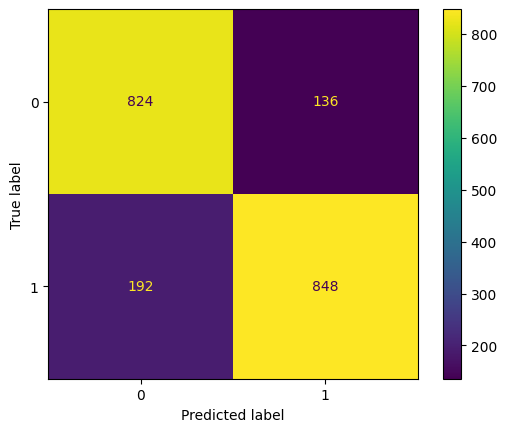

In [ ]:
imdb_confusion_matrix = confusion_matrix(imdb_y_test, imdb_y_pred)

cm_plot = ConfusionMatrixDisplay(confusion_matrix = imdb_confusion_matrix, display_labels = imdb_model.classes_)
cm_plot.plot()

###ROC-AUC Score

ROC-AUC Score: 0.8368589743589744


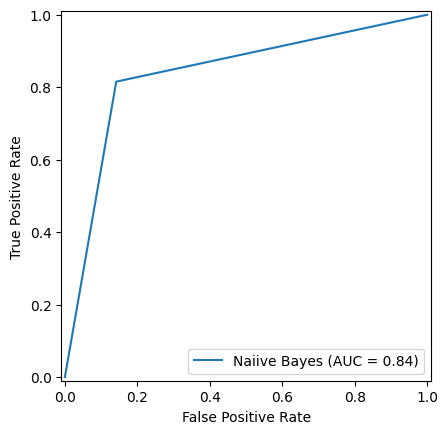

In [ ]:
imdb_roc_auc_score = roc_auc_score(imdb_y_test, imdb_y_pred)

print(f"ROC-AUC Score: {imdb_roc_auc_score}")

imdb_fpr, imdb_tpr, imdb_thresolds = roc_curve(imdb_y_test, imdb_y_pred)
roc_plot = RocCurveDisplay(fpr=imdb_fpr, tpr=imdb_tpr, roc_auc = imdb_roc_auc_score, estimator_name= "Naiive Bayes")
roc_plot.plot()